In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target
df.target = df.target.replace(0, 'setosa')
df.target = df.target.replace(1, 'versicolor')
df.target = df.target.replace(2, 'virginica')

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.linear_model import LogisticRegression

df['label'] = 0
df.loc[df.target == 'setosa', 'label'] = 0
df.loc[df.target == 'virginica', 'label'] = 1
df.loc[df.target == 'versicolor', 'label'] = 2

y = df[['label']]
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]


from sklearn.linear_model import LogisticRegression

df['label'] = 0
df.loc[df.target == 'setosa', 'label'] = 0
df.loc[df.target == 'virginica', 'label'] = 1
df.loc[df.target == 'versicolor', 'label'] = 2

y = df[['label']]
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train.label.ravel())

lr.predict(X_train)


array([2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0], dtype=int64)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def get_test_train_splits(X, y, test_size=0.3, scale=None ,random_no=42):
    
    if scale is not None:
        if scale=='MM':
            _X_cols = X.columns
            _X = MinMaxScaler().fit_transform(X)
            _Xdf = pd.DataFrame(_X)
            _Xdf.columns = _X_cols
            
            X_tr, X_te, y_tr, y_te = train_test_split(_Xdf, y, test_size=test_size, random_state = random_no)
            
        elif scale=='SS':
            _X_cols = X.columns
            _X = StandardScaler().fit_transform(X)
            _Xdf = pd.DataFrame(_X)
            _Xdf.columns = _X_cols
            X_tr, X_te, y_tr, y_te = train_test_split(_Xdf, y, test_size=test_size, random_state = random_no)
        
    else:
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=test_size, random_state = random_no)

    return X_tr, X_te, y_tr, y_te

In [4]:
def get_data(model, X, y):
    
    pred_proba = model.predict_proba(X)
    prob_0 = np.array([pred_proba[i][0] for i in range(0,len(pred_proba))])
    prob_1 = np.array([pred_proba[i][1] for i in range(0,len(pred_proba))])
    prob_2 = np.array([pred_proba[i][2] for i in range(0,len(pred_proba))])
    prob = {'0':prob_0,
            '1':prob_1,
            '2':prob_2,
            }
    
    
    pred = model.predict(X)
    
    label = np.array(y.label.ravel())
    
    return prob, pred, label

In [5]:
def train_model(model,X,y):
    model.fit(X,y.values.ravel())
    print('Training score = ',model.score(X,y))
    return model

In [6]:
X_train, X_test, y_train, y_test = get_test_train_splits(X, y, test_size=0.33, random_no=0)
X_train_MM, X_test_MM, y_train_MM, y_test_MM = get_test_train_splits(X, y, test_size=0.33, scale='MM')
X_train_SS, X_test_SS, y_train_SS, y_test_SS = get_test_train_splits(X, y, test_size=0.33, scale='SS')

In [7]:
from MLLytics import MultiClassMetrics
from MLLytics.plots import plot_roc_auc, plot_rp, plot_confusion_matrix
def make_plots(label, pred, fpr, tpr, threshold, recall, precision):
    plot_confusion_matrix(label, pred, label_names=[1,2,3])
    plot_roc_auc(fpr, tpr, threshold)
    plot_rp(recall, precision, threshold)

## Logistic Regression - Ridge

Training score =  0.95
Test score =  0.9
GOOD TO GO
Confusion matrix, without normalization
[[16  0  0]
 [ 0 20  0]
 [ 0 14  0]]


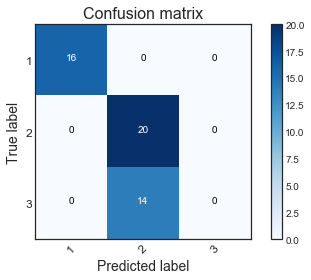

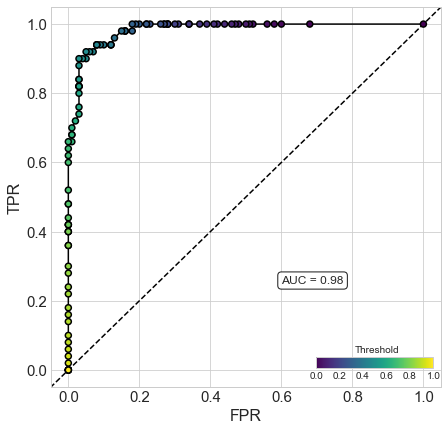

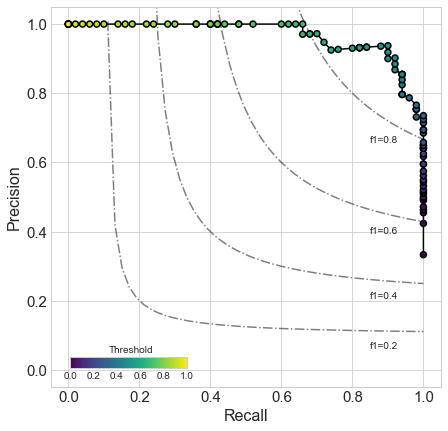

In [8]:
lr = LogisticRegression(penalty='l2') 
lr = train_model(lr, X_train, y_train)
print('Test score = ',lr.score(X_test,y_test))
prob, pred, label = get_data(lr, X_test, y_test)
lr_metrics = MultiClassMetrics(prob, pred, label)
lr_metrics.give_threshold()
make_plots(label, pred, lr_metrics.fpr['micro'], lr_metrics.tpr['micro'],lr_metrics.threshold,
          lr_metrics.recall['micro'], lr_metrics.precision['micro'])

## Logistic regression - Lasso

In [ ]:
lr = LogisticRegression(penalty='l1') 
lr = train_model(lr, X_train, y_train)
print('Test score = ',lr.score(X_test,y_test))
prob, pred, label = get_data(lr, X_test, y_test)
lr_metrics = MultiClassMetrics(prob, pred, label)
lr_metrics.give_threshold()
make_plots(label, pred, lr_metrics.fpr['micro'], lr_metrics.tpr['micro'],lr_metrics.threshold,
          lr_metrics.recall['micro'], lr_metrics.precision['micro'])

## RF

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

In [ ]:
rf = RandomForestClassifier()
rf = train_model(rf, X_train, y_train)
print('Test score = ',rf.score(X_test,y_test))
prob, pred, label = get_data(rf, X_test, y_test)
rf_metrics = MultiClassMetrics(prob, pred, label)
rf_metrics.give_threshold()
make_plots(label, pred, rf_metrics.fpr['micro'], rf_metrics.tpr['micro'],rf_metrics.threshold,
          rf_metrics.recall['micro'], rf_metrics.precision['micro'])

## ExtraTrees

In [ ]:
rf = ExtraTreesClassifier()
rf = train_model(rf, X_train, y_train)
print('Test score = ',rf.score(X_test,y_test))
prob, pred, label = get_data(rf, X_test, y_test)
rf_metrics = MultiClassMetrics(prob, pred, label)
rf_metrics.give_threshold()
make_plots(label, pred, rf_metrics.fpr['micro'], rf_metrics.tpr['micro'],rf_metrics.threshold,
          rf_metrics.recall['micro'], rf_metrics.precision['micro'])

## GBT

In [ ]:
rf = GradientBoostingClassifier()
rf = train_model(rf, X_train, y_train)
print('Test score = ',rf.score(X_test,y_test))
prob, pred, label = get_data(rf, X_test, y_test)
rf_metrics = MultiClassMetrics(prob, pred, label)
rf_metrics.give_threshold()
make_plots(label, pred, rf_metrics.fpr['micro'], rf_metrics.tpr['micro'],rf_metrics.threshold,
          rf_metrics.recall['micro'], rf_metrics.precision['micro'])